In [363]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [364]:
def X_matrix(X, N):
    '''
    Create Polynomial Features
    '''
    n_samples = X.shape[0]
    X_temp = np.ones((n_samples, 1))

    for deg in range(1, N + 1):
        X_temp = np.hstack((X_temp, X ** deg))

    return X_temp

In [365]:
def estimate_B(X, Y):
    '''
    Estimate Parameters Using OLS
    '''
    B = np.linalg.inv(X.T @ X) @ (X.T @ Y)
    return B

In [366]:
# Load data
data = pd.read_csv('train.csv')
train_x = data['x'].to_numpy()
train_y = data['y'].to_numpy()

In [367]:
# # Set seed for reproducibility
# np.random.seed(42)

# # Randomly shuffle indices
# indices = np.arange(len(train_x))
# np.random.shuffle(indices)

# # Split data into training and dev sets (90:10)
# split_index = int(len(train_x) * 0.9)
# train_indices = indices[:split_index]
# dev_indices = indices[split_index:]

# # Create training and dev sets
# train_x, dev_x = train_x[train_indices], train_x[dev_indices]
# train_y, dev_y = train_y[train_indices], train_y[dev_indices]

# Sort the data by x
sorted_indices = np.argsort(train_x)
train_x_sorted = train_x[sorted_indices]
train_y_sorted = train_y[sorted_indices]

# Split data into training and dev sets (90:10) after sorting
split_index = int(len(train_x) * 0.9)

# First 90% for training, remaining 10% for dev
train_split_x, dev_x = train_x_sorted[:split_index], train_x_sorted[split_index:]
train_split_y, dev_y = train_y_sorted[:split_index], train_y_sorted[split_index:]

In [368]:
# Variables
degrees = range(1, 30)
train_ssr = []
dev_ssr = []
train_r2 = []
dev_r2 = []

In [369]:
# Fit models for each degree
for degree in degrees:
    X_train = X_matrix(train_split_x.reshape(-1, 1), degree)
    B = estimate_B(X_train, train_split_y)
    
    # Predictions for training and dev sets
    pred_train = X_train @ B
    X_dev = X_matrix(dev_x.reshape(-1, 1), degree)
    pred_dev = X_dev @ B
    
    # Calculate SSR
    train_ssr.append(np.sum((pred_train - train_split_y) ** 2))
    dev_ssr.append(np.sum((pred_dev - dev_y) ** 2))

    # Calculate SSY
    SSy_train = np.sum((train_split_y - np.mean(train_split_y)) ** 2)
    SSy_dev = np.sum((dev_y - np.mean(dev_y)) ** 2)

    # Calculate R^2
    train_r2.append( 1 - (np.sum((pred_train - train_split_y) ** 2) / SSy_train))
    dev_r2.append( 1 - (np.sum((pred_dev - dev_y) ** 2) / SSy_dev))

[350328.5320934267, 348716.787308453, 318420.7136953245, 221664.66766884518, 212361.49130637269, 212351.53263824276, 212330.38588362874, 212032.05997895295, 211136.0036978497, 210970.25749949735, 210692.65492141215, 210672.13784248874, 210021.47278034556, 209026.23610227785, 208565.86060336555, 203203.53046863552, 202475.53350050686, 202196.1329405958, 201477.73696117726, 206354.86228126465, 1049034.4349345958, 4568020.33005719, 433029.3115319959, 248715.91380948163, 896355.1144727372, 69359283.7024, 41544105.43281468, 642711897770.0441, 1877797.7539452156] [466876.9039869341, 518769.61130764615, 249497.72797748144, 36195.87363314157, 45281.016367653945, 49205.48231359603, 58940.96342347047, 26543.80859998492, 250100.55972700974, 635265.5702887044, 47905.33413133667, 190206.4868294844, 10185290.894348802, 8110269.742668382, 18767592.252191156, 1329910536.1072493, 144440511.66033217, 158754788.15056154, 5887738281.671957, 5580131276.917435, 3342996213.0684056, 2759979017.0209684, 514431

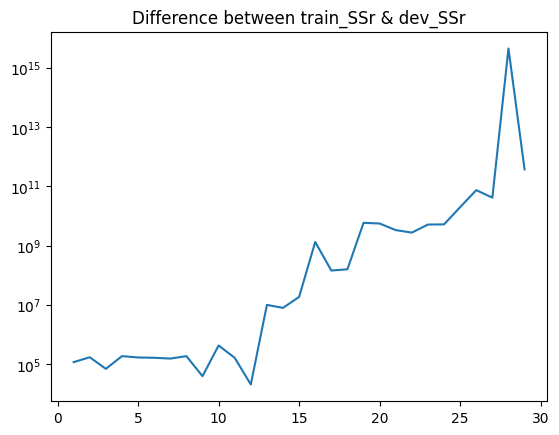

In [370]:
# Difference between train_SSr & dev_SSr
print(train_ssr,dev_ssr)
diff = np.abs(np.array(train_ssr) - np.array(dev_ssr))
print(diff)

plt.plot(degrees, diff)
plt.yscale('log')
plt.title('Difference between train_SSr & dev_SSr')
plt.show()

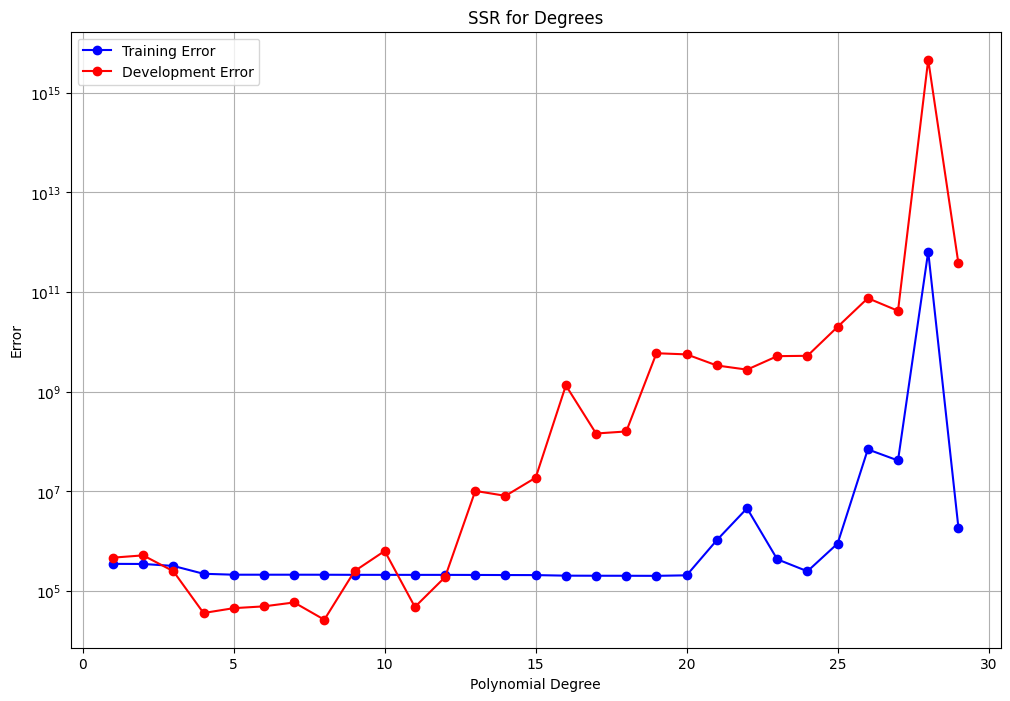

In [371]:
# Plot Training and Development SSR
plt.figure(figsize=(12,8))
plt.plot(degrees, train_ssr, label = 'Training Error', marker = 'o', color = 'blue')
plt.plot(degrees, dev_ssr, label = 'Development Error', marker = 'o', color = 'red')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('SSR for Degrees')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

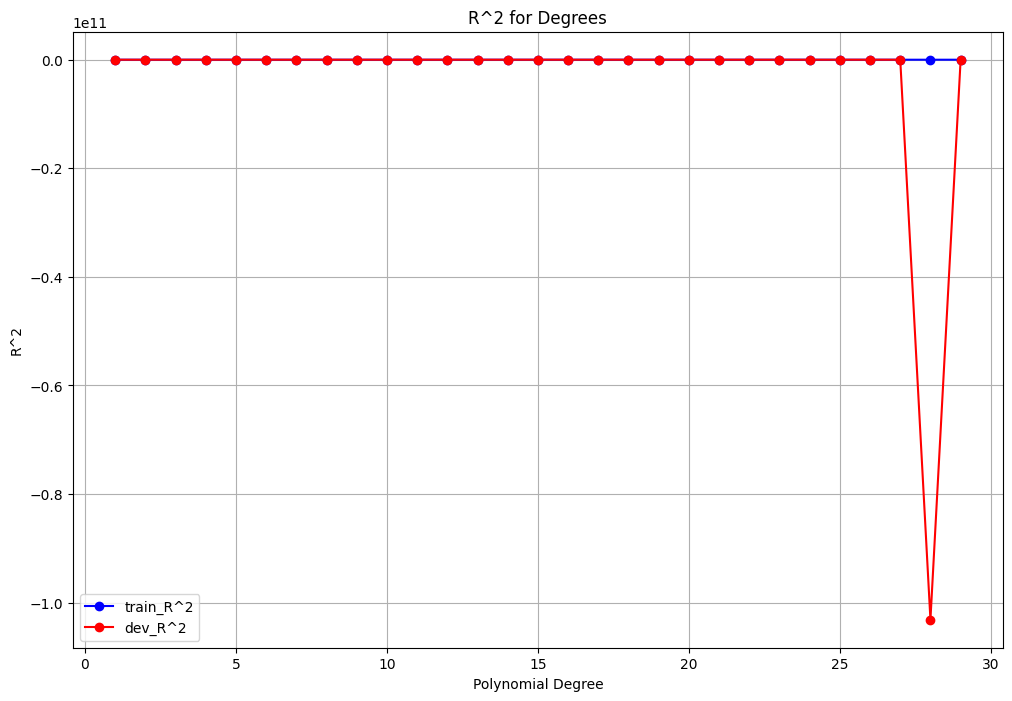

In [372]:
# Plot Training R^2 and Development R^2 Score
plt.figure(figsize=(12,8))
plt.plot(degrees, train_r2, label = 'train_R^2', marker = 'o', color = 'blue')
plt.plot(degrees, dev_r2, label = 'dev_R^2', marker = 'o', color = 'red')

plt.xlabel('Polynomial Degree')
plt.ylabel('R^2')
plt.title('R^2 for Degrees')
plt.legend()
plt.grid(True)
# plt.yscale('log')
plt.show()

In [373]:
# X_train = X_matrix(train_x_sorted.reshape(-1, 1), 21)
# B = estimate_B(X_train, train_y_sorted)
# print(X_train)
# print(B)

# # Predictions for training and dev sets
# pred_train = X_train @ B
# plt.scatter(train_x_sorted,train_y_sorted,color = 'red')
# plt.plot(train_x_sorted,pred_train, color = 'blue')
# plt.show()